<a href="https://colab.research.google.com/github/irenenamukwaya/Demo/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMUKWAYA IRENE

23/U/23737

2300723737

In [60]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# 2. LOAD THE DATA
df = pd.read_csv("/content/MoMTSim_20240722202413_1000_dataset.csv")
# df = pd.read_csv("/content/MoMTSim_20240722202413_1000_dataset.csv", on_bad_lines='skip')

In [72]:
# 3. EXPLORE THE DATA

# 3.1 View the first few rows to understand the data structure
print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,step,transactionType,amount,initiator,oldBalInitiator,newBalInitiator,recipient,oldBalRecipient,newBalRecipient,isFraud
0,0,PAYMENT,579.16,4018807983755588,29.32,29.32,30-0000345,0.00,0.00,0.0
1,0,TRANSFER,39.03,4610593854752035,39.03,0.00,4944921135715488,55.94,94.98,1.0
2,0,TRANSFER,21.78,4840578447365454,21.78,0.00,4305579785620656,58.09,79.88,1.0
3,0,PAYMENT,570.22,4958066799829630,5.29,5.29,00-0000388,0.00,0.00,0.0
4,0,PAYMENT,574.80,4149196095918843,82.63,82.63,80-0005320,0.00,0.00,0.0


In [73]:
# 3.2 Check the dimensions of the DataFrame
print(f"\nShape of the DataFrame: {df.shape}")



Shape of the DataFrame: (13568, 10)


In [74]:
# 3.3 Get a quick statistical summary of the numeric columns
print("\nStatistical summary of numeric columns:")
display(df.describe())


Statistical summary of numeric columns:


,step,amount,initiator,oldBalInitiator,newBalInitiator,oldBalRecipient,newBalRecipient,isFraud
count,13568.0,13568.000000,1.356800e+04,13568.000000,13568.000000,13568.000000,1.356800e+04,13567.000000
mean,0.0,18634.216390,4.497284e+15,43841.791482,26851.750810,20684.685441,3.767461e+04,0.558635
std,0.0,71006.534356,2.878215e+14,118326.866443,96541.639873,82690.623345,1.118433e+05,0.496568
min,0.0,0.050000,4.000120e+15,-112106.910000,-129848.710000,0.000000,0.000000e+00,0.000000
25%,0.0,86.487500,4.249819e+15,36.310000,0.000000,0.000000,6.671500e+01,0.000000
50%,0.0,580.670000,4.492354e+15,85.220000,0.000000,58.990000,5.812300e+02,1.000000
75%,0.0,11591.895000,4.742905e+15,21071.425000,1849.710000,610.210000,1.747617e+04,1.000000
max,0.0,998296.460000,4.999936e+15,998296.460000,987348.300000,991280.310000,1.314513e+06,1.000000


In [75]:
# 3.4 Check for missing values
print("\nNumber of missing values in each column:")
display(df.isnull().sum())


Number of missing values in each column:


,0
step,0
transactionType,0
amount,0
initiator,0
oldBalInitiator,0
newBalInitiator,0
recipient,0
oldBalRecipient,0
newBalRecipient,0
isFraud,1


In [76]:
mean = df['amount'].mean()
std_dev = df['amount'].std()
print(f"Mean: {mean}, Standard Deviation: {std_dev}")


Mean: 18634.216390035377, Standard Deviation: 71006.53435593344


This indicates that on average, transactions are around 18.6K, but there's a wide variability—some transactions are significantly higher, as seen from the large standard deviation.



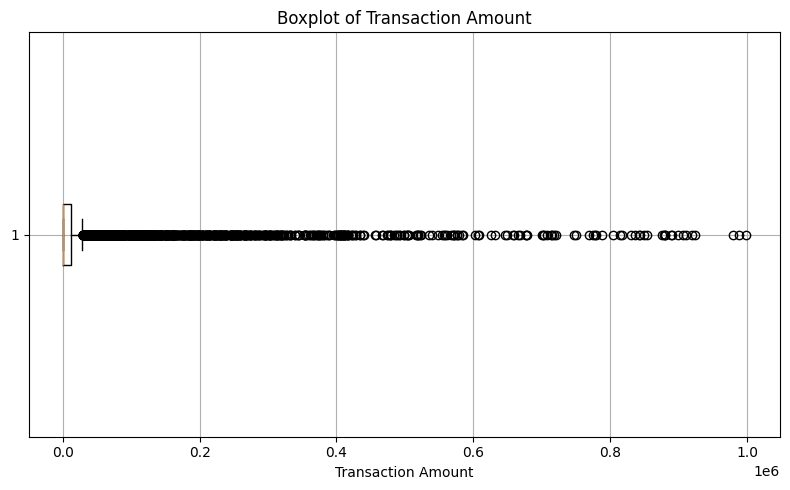

In [77]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['amount'], vert=False)
plt.title("Boxplot of Transaction Amount")
plt.xlabel("Transaction Amount")
plt.grid(True)
plt.tight_layout()
plt.show()


In the boxplot of the transaction amount, there is a highly skewed distribution, where the majority of data points are concentrated near the lower end of the scale.

Numerous outliers—many transactions lie far from the central box, stretching out to nearly 1 million in value.

This confirms the earlier observation that while the average transaction is relatively low, a few very high-value transactions greatly increase the spread and standard deviation.



In [78]:
total_transactions = len(df)
fraud_transactions = df['isFraud'].sum()
fraud_probability = fraud_transactions / total_transactions
print(f"Overall Fraud Probability: {fraud_probability:.4f}")

Overall Fraud Probability: 0.5586


This suggests a fraud-heavy dataset, likely curated for fraud detection studies or simulations.

In [79]:
type_of_interest = 'TRANSFER'
subset = df[df['transactionType'] == type_of_interest]
conditional_fraud_prob = subset['isFraud'].mean()
print(f"Probability of fraud given transaction type = '{type_of_interest}': {conditional_fraud_prob:.4f}")


Probability of fraud given transaction type = 'TRANSFER': 0.9789


This is extremely high, indicating that nearly all "TRANSFER" transactions are fraudulent.



The fraud rate for 'TRANSFER' transactions (97.89%) is much higher than the overall rate (55.86%).

Therefore fraud is not evenly distributed across transaction types—certain transaction types (like 'TRANSFER') are high-risk and should be prioritized for fraud detection efforts.

**Report Summary**

Analysis of the dataset reveals that the average transaction amount is 18,634.22, with a standard deviation of 71,006.53. The boxplot of transaction amounts confirms that while most transactions are relatively small, there are significant outliers—some as large as 1 million—which increase the variability in the dataset. Fraud appears to be a major issue in this dataset, with an overall fraud probability of 55.86%. This means that more than half of all transactions are fraudulent. More notably, 97.89% of 'TRANSFER' transactions are fraudulent. This suggests that fraudsters heavily favor the 'TRANSFER' transaction type, possibly because it allows quick movement of funds. Therefore, the dataset is skewed in both transaction amounts and fraud distribution. Fraud detection systems should pay special attention to high-value transactions and prioritize 'TRANSFER' type transactions as they represent a significant fraud risk.
